In [16]:
import torch # 파이토치 기본 라이브러리
import torchvision # 이미지 관련 된 파이토치 라이브러리
import torchvision.transforms as tr # 이미지 전처리 기능들을 제공하는 라이브러리
from torch.utils.data import DataLoader, Dataset # 데이터를 모델에 사용할 수 있도록 정리해 주는 라이브러리
import numpy as np # 넘파이 기본 라이브러리
import matplotlib.pyplot as plt

In [17]:
class CutOut:

    def __init__(self, ratio=.5):
        self.ratio = int(1 / ratio)

    def __call__(self, inputs):
        active = int(np.random.randint(0, self.ratio, 1)[0])  # 첫 번째 원소 추출

        if active == 0:
            _, w, h = inputs.size()
            min_len = min(w, h)
            box_size = int(min_len // 4)
            idx = int(np.random.randint(0, min_len - box_size, 1)[0])  # 첫 번째 원소 추출
            inputs[:, idx:idx + box_size, idx:idx + box_size] = 0

        return inputs

In [19]:
def imshow(img):
    plt.figure(figsize=(10,100))
    plt.imshow(img.permute(1,2,0).numpy())
    plt.show()

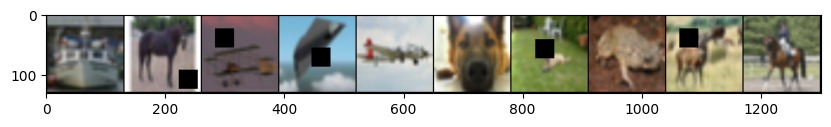

torch.Size([10, 3, 128, 128])


In [21]:
transf = tr.Compose([tr.Resize(128), tr.ToTensor(), CutOut()])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transf)

trainloader = DataLoader(trainset, batch_size=10, shuffle=True)
images, labels = next(iter(trainloader))
imshow(torchvision.utils.make_grid(images,nrow=10))
print(images.size()) # 배치 및 이미지 크기 확인

